In [35]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

import random
import matplotlib.pyplot as plt

In [191]:
model = tf.keras.Sequential(name = 'test_model_1')

model.add(tf.keras.layers.InputLayer(input_shape = (1,)))
#model.add(tf.keras.layers.Dense(5, activation='softplus'))
model.add(tf.keras.layers.Dense(1, activation='softplus'))

model.summary()

Model: "test_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [192]:
SAMPLES = 200

x = [random.random() for _ in range(SAMPLES)]

In [193]:
y = model.predict(x)

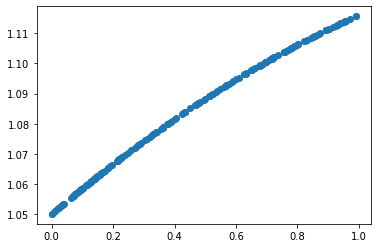

In [194]:
plt.scatter(x,y)

### Учим сеть линейной функции

In [195]:
def func(x):
    return x*x

In [196]:
x_train = [random.random() for _ in range(SAMPLES)]
y_train = [func(i) for i in x_train]

x_val = [1 + random.random()*0.1 for _ in range(int(SAMPLES*0.1))]
y_val = [func(i) for i in x_val]

y_pred = model.predict(x_train)

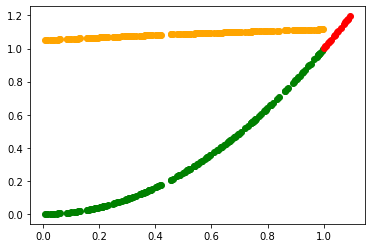

In [197]:
plt.scatter(x_train, y_train, color='green')
plt.scatter(x_val, y_val, color='red')
plt.scatter(x_train, y_pred, color='orange')

In [198]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ['mse'],
)

In [199]:
res = model.fit(
    x_train, y_train,
    batch_size = 10,
    epochs = 500,
    validation_data = (x_val, y_val),
    shuffle = True,
)

Epoch 1/500
20/20 [==============================] - 1s 10ms/step - loss: 0.6023 - mse: 0.6023 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4277 - mse: 0.4277 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3648 - mse: 0.3648 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3154 - mse: 0.3154 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2749 - mse: 0.2749 - val_loss: 0.1164 - val_mse: 0.1164
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2426 - mse: 0.2426 - val_loss: 0.1444 - val_mse: 0.1444
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2156 - 

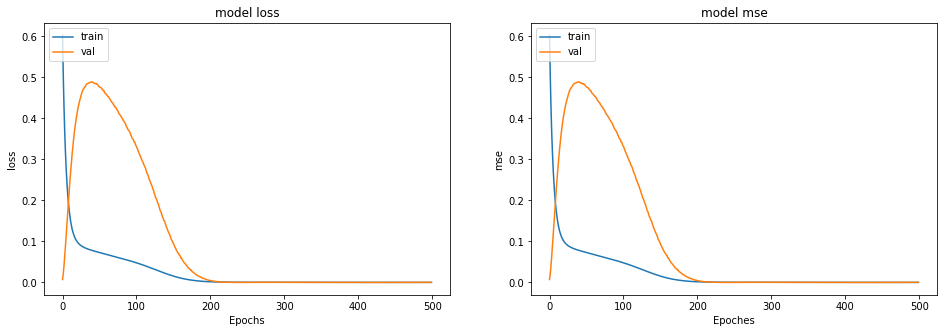

In [200]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(121)
ax.plot(res.history['loss'])
ax.plot(res.history['val_loss'])
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('Epochs')
ax.legend(['train', 'val', 'runs'], loc='upper left')

ax = fig.add_subplot(122)
ax.plot(res.history['mse'])
ax.plot(res.history['val_mse'])
ax.set_title('model mse')
ax.set_ylabel('mse')
ax.set_xlabel('Epoches')
ax.legend(['train', 'val', 'runs'], loc='upper left')

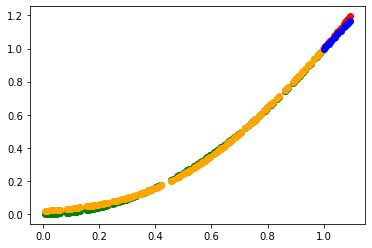

In [201]:
y_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

plt.scatter(x_train, y_train, color='green')
plt.scatter(x_val, y_val, color='red')
plt.scatter(x_train, y_pred, color='orange')
plt.scatter(x_val, y_val_pred, color='blue')